# Ajustando uma curva aos dados da galáxia NGC 4501:

In [13]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import plotly.graph_objs as go
from numpy import arange
from scipy.optimize import curve_fit
from matplotlib import pyplot

Dados derivados da curva de rotação.

- 'xdata' mostra a distância radial, em kpc.

- 'ydata' mostra a velocidade, em km s⁻¹.

In [26]:
l = [0.3,0.49,0.71,1.11,1.42,1.74,2.1,2.67,3.4,4.06,4.59,5.12,5.8,6.57,7.26]
g = [12.9,46.8,83.8,166.3,199.06,227.5,244.6,253.2,274.6,270.4,294.64,293.27,303.3,293.4,296.33]
print(len(g))

15


In [46]:
# Gás se aproximando

radius = np.array([ 0.3,0.49,0.71,1.11,1.42,1.74,2.1,2.67,3.4,4.06,4.59,5.12,5.8,6.57,7.26,
        8.86475423, 10.60604524, 12.34733625, 14.08862726, 15.82991827,
       17.57120928, 19.31250029, 21.0537913 , 22.79508231, 24.53637332,
       26.27766432, 28.01895533, 29.76024634, 31.50153735, 33.24282836,
       34.98411937, 36.72541038, 38.46670139, 40.2079924 , 41.94928341,
       43.69057442, 45.43186543, 47.17315644])

velocity = np.array([12.9,46.8,83.8,166.3,199.06,227.5,244.6,253.2,274.6,270.4,294.64,293.27,303.3,293.4,296.33,
                     210.32529973, 211.68917458, 213.26239175,
       215.42438416, 223.88699865, 229.4820596 , 236.16211461,
       236.16211461, 230.20288526, 230.21063868, 230.17187159,
       231.58226695, 228.89304205, 231.93868193, 230.71436862,
       226.84735092, 229.45104592, 230.56705366, 233.6744786 ,
       236.5650501 , 236.5650501 , 241.07535928, 246.50784072])

In [47]:
kpc = 3.086e+21 # conversão de [kpc] para [cm];
massa_solar = 1.9889999e+33 # conversão de [massa solar] para [g];
radius = radius * 3.086e+21 # passar de [kpc] para [cm], a fim de deixar as unidades no sistema cgs;
velocity = velocity * 1e5 # passar de [km s⁻¹] para [cm s⁻¹];
G = 6.67e-8 # constante gravitacional em [cm³ g⁻¹ s⁻²];
diametropixel = 0.085993765 # em [kpc]

In [48]:
# diametropixel = 0.085993765 # em [kpc]
# scale_radius_halo = (216.17887*2)*diametropixel # quantidade de pixels que correspondem ao raio halo multiplicada por 2,
#                                         # vezes o diâmetro físico de cada pixel
# print('O raio do halo é: ',scale_radius_halo,' kpc!') # em [kpc]

In [57]:
scale_length_bojo = (15.2387/1.8153)*diametropixel # valor tirado de S4G: https://irsa.ipac.caltech.edu/data/SPITZER/S4G/galaxies/NGC4698/P4/NGC4698_bd.outgal
                                                # tá dividido por 1.7 porque tem uma relação que diz que o raio efetivo é 1.7 x o scale length: http://burro.case.edu/Academics/Astr222/Galaxies/Intro/properties.html

print('O raio do bojo é: ',scale_length_bojo,' kpc!') # em [kpc]

O raio do bojo é:  0.7218824363496392  kpc!


In [58]:
scale_length_disco = (52.8868)*diametropixel # valor tirado de S4G: https://irsa.ipac.caltech.edu/data/SPITZER/S4G/galaxies/NGC4698/P4/NGC4698_bd.outgal

print('O raio do disco é: ',scale_length_disco,' kpc!') # em [kpc]

O raio do disco é:  4.547935050802  kpc!


Definindo a função Python a partir da equação 8.16, de Dynamics and Astrophysics of Galaxies, disponível em:
http://astro.utoronto.ca/~bovy/AST1420/notes/notebooks/07.-Flattened-Mass-Distributions.html#Some-general-considerations#


In [59]:
def fit_curve(radius,M_h,R_h):
    G = 6.67e-8
    a = scale_length_disco * kpc
    R = radius
    R_b = scale_length_bojo * kpc
#     R_h = scale_radius_halo * kpc
    M_b = 7722834333.776 * massa_solar
    M_d = 125179189956.762 * massa_solar
    
    comp1 = ((G*M_b*R)/(R+R_b)**2)
    comp2 = ((G*M_d*(R**2))/(((R**2)+(a**2))**(3/2)))
    comp3 = (R*((2*G*M_h*(R+R_h)*np.log((R+R_h)/R_h)-2*G*M_h*R)/((R**2)*np.log(4)*R_h + 
                                                    (R**3)*np.log(4)-(R**2)*R_h-R**3)))
    
    return np.sqrt(comp1 + comp2 + comp3)

In [60]:
a = scale_length_disco * kpc
R = radius
R_b = scale_length_bojo * kpc
# R_h = scale_radius_halo * kpc
M_b = 7722834333.776 * massa_solar
M_d = 125179189956.762 * massa_solar

popt, pcov = curve_fit(fit_curve, radius, velocity, p0=[6e11*massa_solar,40*kpc])#, 1.1*kpc, 35*kpc])
#                                                     bounds=((1e8*massa_solar, 1e10*massa_solar,
#                                                              1e11*massa_solar, 0.2*kpc, 5*kpc),
#                                                             (3e10*massa_solar, 3e11*massa_solar,
#                                                              5e15*massa_solar, 4*kpc, 5000*kpc)))
M_h,R_h = popt

/tmp/ipykernel_24962/3873076506.py:15: RuntimeWarning:

invalid value encountered in sqrt



In [61]:
print('Massa do Bojo (log):   ',round(np.log10(M_b/massa_solar),3))
print('Massa do Disco (log):  ',round(np.log10(M_d/massa_solar),3))
print('"Massa" do Halo (log): ',round(np.log10(M_h/massa_solar),3))
print('Scale lenght do Bojo:  ',round((R_b/kpc),2), ' kpc')
print('Scale radius do Halo:  ',round((R_h/kpc),2), 'kpc')
print('Scale lenght do Disco: ',round((a/kpc),2), ' kpc')

Massa do Bojo (log):    9.888
Massa do Disco (log):   11.098
"Massa" do Halo (log):  11.027
Scale lenght do Bojo:   0.72  kpc
Scale radius do Halo:   14.27 kpc
Scale lenght do Disco:  4.55  kpc


# Gerando cada curva isoladamente:

In [62]:
# Bojo de Hernquist
bojo = np.sqrt((G*M_b*R)/(R+R_b)**2)

# Disco de Kuzmin
disk = np.sqrt((G*M_d*(R**2))/(((R**2)+(a**2))**(3/2)))

# Halo de NFW
halo = np.sqrt(R*((2*G*M_h*(R+R_h)*np.log((R+R_h)/R_h)-2*G*M_h*R)/((R**2)*np.log(4)*R_h + 
                                                    (R**3)*np.log(4)-(R**2)*R_h-R**3)))

# Plot final

In [63]:
velocidade = []
raios = []
for line in open('/home/natanael/Área de Trabalho/Iniciação Científica/Milky Way rotation curve.txt', 'r'):
    values = [float(s) for s in line.split()]
    velocidade.append(values[1])
    raios.append(values[0])

In [69]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = raios,y = velocidade, line=dict(color='red', width=0.7, dash='solid'),
                   mode = 'lines',
                   marker = dict(symbol = 'circle-dot', size=3, color = 'red'),
                   name = 'Milky Way (Sofue 2020)'))

fig.add_trace(go.Scatter(x = radius[0:15]/kpc,y = velocity[0:15]/1e5, line=dict(color='black', width=0.7, dash='solid'),
                   mode = 'markers',
                   marker = dict(symbol = 'diamond', size=3, color = 'red'),
                   name = 'H-alpha data (Rubin+99)'))

fig.add_trace(go.Scatter(x = radius[15:200]/kpc,y = velocity[15:200]/1e5, line=dict(color='black', width=0.7, dash='solid'),
                   mode = 'markers',
                   marker = dict(symbol = 'square', size=3, color = 'black'),
                   name = 'HI data'))

fig.add_trace(go.Scatter(x = radius/kpc, y = fit_curve(R, *popt)/1e5,line=dict(color='black', width=0.8),
                   mode = 'lines',
                   marker = dict(symbol = 'circle-dot', size=5, color = 'black'),
                   name = 'Best fit'))

fig.add_trace(go.Scatter(x = radius/kpc, y = bojo/1e5,line=dict(color='rgba(255,165,0, 1)', width=1, dash='dot'),
                   mode = 'lines',
                   marker = dict(symbol = 'circle-dot', size=3, color = 'rgba(255,165,0, 1)'),
                   name = 'Bulge'))

fig.add_trace(go.Scatter(x = radius/kpc, y = disk/1e5,line=dict(color='royalblue', width=1, dash='dash'),
                   mode = 'lines',
                   marker = dict(symbol = 'circle-dot', size=3, color = 'rgba(8, 0, 246, 0.8)'),
                   name = 'Disk'))

fig.add_trace(go.Scatter(x = radius/kpc, y = halo/1e5,line=dict(color = 'rgba(153, 51, 230, 1.0)', width=1, 
                   dash='dashdot'), mode = 'lines',
                   marker = dict(symbol = 'circle-dot', size=3, color = 'rgba(153, 51, 153, 1.0)'),
                   name = 'Halo'))

fig.add_vrect(x0="3.5", x1="4.5", 
              annotation_text="Milky Way scale-length", annotation_position="top left",
              fillcolor="green", opacity=0.2, line_width=0)

fig.add_vline(x=8, annotation_text="Sun position",annotation_position="bottom right",
              line_width=1.5, line_dash="dash", line_color="green",opacity=0.4)

fig.add_vline(x=scale_length_disco, annotation_text="",annotation_position="bottom right",
                  line_width=1.5, line_dash="dot", line_color="red",opacity=0.4)

fig.update_layout(paper_bgcolor='rgba(255,255,255,1)', plot_bgcolor='rgba(255,255,255,1)')

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.55,
    xanchor="right",
    x=0.98),
    autosize=False,
    width=650,
    height=550,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4),
    paper_bgcolor='rgba(255,255,255,1)', plot_bgcolor='rgba(255,255,255,1)')

fig.update_xaxes(showline=True, linewidth=0.005, linecolor='black',ticks="outside")
fig.update_yaxes(showline=True, linewidth=0.005, linecolor='black',ticks="outside")

fig.update_layout(title = dict(text = "Rotation curve decomposition - NGC 4501",x = .2), 
                  xaxis = dict(range = [0,45], title = 'Radius     [kpc]'),
                  yaxis = dict(range = [0,320], title = 'Circular velocity     [km s⁻¹]'))

# with open("NGC4579 RC.html", "w") as f:
#     f.write(fig.to_html())

------------------------------------------------------------------------------------------------------------------

$$\textrm{Massa cumulativa no modelo de Hernquist: } M_b(<R)= M_b \frac{R^2}{(R+A)^2} \qquad (Bojo)$$

In [8]:
massa_bojo = []

for i in range(len(R)):
    massa_bojo.append(M_b*(R[i]**2/(R[i]+A)**2))

massabojo = np.array(massa_bojo)
massa_do_bojo = np.log10(massabojo/massa_solar)

-

$$\textrm{Massa cumulativa no modelo de Kuzmin: } M_d(<R)= M_d \left( 1-\frac{a}{\sqrt{R^2+a^2}}\right) \qquad (Disco)$$

In [9]:
massa_disk = []

for i in range(len(R)):
    massa_disk.append(M*(1-((a)/(np.sqrt((R[i]**2)+(a**2))))))

massadisk = np.array(massa_disk)
massa_do_disco = np.log10(massadisk/massa_solar)

-

In [10]:
massa_halo = []

for i in range(len(R)):
    massa_halo.append(R[i]*halo[i]**2/G)

massahalo = np.array(massa_halo)
massa_do_halo = np.log10(massahalo/massa_solar)

In [11]:
# fig = go.Figure()

# fig = make_subplots(rows=1, cols=2)

fig = make_subplots(
    rows=1, cols=2)#, subplot_titles=("$$Curva \,\, de \,\, massa:\,\, M_\odot$$", "$$Curva \,\, de \,\, massa: \,\, \log$$"))


# fig.append_trace(go.Scatter(x = xdata/39.12024, y = massabojo/massa_solar,line=dict(color='rgba(255,165,0, 1)', width=1, dash='dot'),
#                    mode = 'lines',
#                    marker = dict(symbol = 'circle-dot', size=3, color = 'rgba(255,165,0, 1)'),
#                    name = 'Bojo',legendgroup = '1'), row=1, col=1)

# fig.append_trace(go.Scatter(x = xdata/39.12024, y = massadisk/massa_solar,line=dict(color='royalblue', width=1, dash='dash'),
#                    mode = 'lines',
#                    marker = dict(symbol = 'circle-dot', size=3, color = 'rgba(8, 0, 246, 0.8)'),
#                    name = 'Disk'),row=1, col=1)

# fig.append_trace(go.Scatter(x = xdata/39.12024, y = massahalo/massa_solar,line=dict(color = 'rgba(153, 51, 230, 1.0)', width=1, 
#                    dash='dashdot'), mode = 'lines',
#                    marker = dict(symbol = 'circle-dot', size=3, color = 'rgba(153, 51, 153, 1.0)'),
#                    name = 'Halo'),row=1, col=1)




fig.append_trace(go.Scatter(x = xdata/39.12024, y = massa_do_bojo,line=dict(color='rgba(255,165,0, 1)', width=1, dash='dot'),
                   mode = 'lines',
                   marker = dict(symbol = 'circle-dot', size=3, color = 'rgba(255,165,0, 1)'),
                   name = 'Bojo',legendgroup = '1'), row=1, col=1)

fig.append_trace(go.Scatter(x = xdata/39.12024, y = massa_do_disco,line=dict(color='royalblue', width=1, dash='dash'),
                   mode = 'lines',
                   marker = dict(symbol = 'circle-dot', size=3, color = 'rgba(8, 0, 246, 0.8)'),
                   name = 'Disk'),row=1, col=1)

fig.append_trace(go.Scatter(x = xdata/39.12024, y = massa_do_halo,line=dict(color = 'rgba(153, 51, 230, 1.0)', width=1, 
                   dash='dashdot'), mode = 'lines',
                   marker = dict(symbol = 'circle-dot', size=3, color = 'rgba(153, 51, 153, 1.0)'),
                   name = 'Halo'),row=1, col=1)



fig.append_trace(go.Scatter(x = xdata/39.12024, y = massa_do_bojo,line=dict(color='rgba(255,165,0, 1)', width=1, dash='dot'),
                   mode = 'lines',
                   marker = dict(symbol = 'circle-dot', size=3, color = 'rgba(255,165,0, 1)'),
                   name = 'Bulge'),row=1, col=2)

fig.append_trace(go.Scatter(x = xdata/39.12024, y = massa_do_disco,line=dict(color='royalblue', width=1, dash='dash'),
                   mode = 'lines',
                   marker = dict(symbol = 'circle-dot', size=3, color = 'rgba(8, 0, 246, 0.8)'),
                   name = 'Disk'),row=1, col=2)

fig.append_trace(go.Scatter(x = xdata/39.12024, y = massa_do_halo,line=dict(color = 'rgba(153, 51, 230, 1.0)', width=1, 
                   dash='dashdot'), mode = 'lines',
                   marker = dict(symbol = 'circle-dot', size=3, color = 'rgba(153, 51, 153, 1.0)')),row=1, col=2)


fig.update_xaxes(title_text="$$ R/R_{25}$$", row=1, col=1)
fig.update_yaxes(title_text="$$Massa \quad [M_\odot]$$", row=1, col=1)

fig.add_annotation(x=1.1, y=9.5,
            text="Bojo",
            showarrow=True,
            arrowhead=1)

fig.add_annotation(x=0.85, y=11.1,
            text="Disco",
            showarrow=True,
            arrowhead=1)

fig.add_annotation(x=1.12, y=11.7,
            text="Halo",
            showarrow=True,
            arrowhead=1)


fig.update_xaxes(title_text="$$ Raio \quad [kpc]$$", row=1, col=2)
fig.update_yaxes(title_text="$$Massa \quad [\log(M/M_\odot)]$$", row=1, col=2)



fig.update_layout(paper_bgcolor='rgba(255,255,255,1)', plot_bgcolor='rgba(255,255,255,1)')

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.70,
    xanchor="right",
    x=0.22
))

fig.update_layout(
    autosize=False,width=900,height=500,
    margin=dict(l=50,r=50,b=100,t=100,pad=4),
    font=dict(size=13, color="black"),
    paper_bgcolor='rgba(255,255,255,1)', plot_bgcolor='rgba(255,255,255,1)')

fig.update_xaxes(showgrid=False)
fig.update_yaxes(nticks=5)

fig.update_layout(title = dict(text = "$$Curva \,\, de \,\, massa \,\, - \,\, NGC \,4501$$",x = .5)) 
#                   xaxis = dict(title = '$$ Radius \quad [kpc]$$'),
#                   yaxis = dict(title = 'Mass \quad [\log_{10} (M_\star/M_\odot)]$$Mass \quad [M_\odot]$$'))

fig.update_layout(
    yaxis = dict(
        showexponent = 'all',
        exponentformat = 'power'
    ),showlegend=False)

fig.update_xaxes(showline=True, linewidth=0.005, linecolor='black',ticks="outside")
fig.update_yaxes(showline=True, linewidth=0.005, linecolor='black',ticks="outside")



# tickvals=[0,1e7, 1e8, 1e9,1e10,1e11,1e12],

# with open("NGC4579 RC.png", "w") as f:
#     f.write(fig.to_html())

$$\textrm{NFW Profile: }  M_h(v_c,R)=\frac{v_c^2\cdot\left[R\,(\log(4)-1)(R_s+R)\right]}{2G\,\left[R\,\left(\log\left(\frac{R}{R_s} +1\right)-1\right)+R_s \, \log\left(\frac{R}{R_s}+1\right)\right]} \qquad \qquad (Halo)$$

------------------------------------------------------------------------------------------------------------------

$$G = 6.67 \times 10^{-8} \,\, cm^3\,g^{-1}\,s^{-2}$$

$$ \textrm{Equação tradicional: } M_G = \frac{v_c^2 \cdot R}{G}$$

$$\textrm{Hernquist Model: } M_b(v_c,R)=\frac{v_c^2\,(R+A)^2}{GR} \qquad \qquad (Bojo)$$

$$\textrm{Kuzmin Model: } M_d(v_c,R) = \frac{v_c^2\,(R^2+a^2)^{\frac{3}{2}}}{GR^2} \qquad \qquad (Disco)$$

In [12]:
# massa_bojo = ((bojo**2)*(R+A)**2)/(G*(R**2)) # Errado
# massa_disk = (((disk)**2)*((R**2)+((a*3.086e+21)**2))**(3/2))/(G*R**2) # Errado
# massa_halo = ((halo**2)*(R*(np.log(4)-1)*(R_s+R)))/(2*G*(R*(np.log((R/R_s)+1)-1)+R_s*(np.log((R/R_s)+1))))

Esse passo a passo tá errado porque, pra cada componente, a fórmula da massa deve ser diferente, i. e., Kuzmin model, Heinrquest e NFW model.

Ideia: Calcular a massa de cada componente separadamente em TODOS os pontos e depois calcular a porcentagem de contribuiçao de cada uma delas em cada ponto para a massa total (dinâmica!); depois disso, definir três cores (uma pra cada componente) e fazer o mapa de distribuição com a porcentagem da cor. Tipo, com 1 kpc de raio, a contribuição do bojo é 70%, do disco é 20% e do halo é 10%; então eu escolheria essa porcentagem para cada uma das três cores pra representar aquele raio, e assim por diante, até a porcentagem de cor do halo ser muito mais visível

In [13]:
R = 47.17316*kpc
R_s = 69*kpc

np.log10((M_s*(np.log(1+(R/R_s))-((R/R_s)/(1+(R/R_s)))))/massa_solar)

10.985235219740439

In [14]:
distribuicao_diskk = []

for i in range(len(massadisk)-1):
    distribuicao_diskk.append(massadisk[i+1]-massadisk[i])
    
distribuicao_disk = np.array(distribuicao_diskk)

#----------------------------------------------------------------

distribuicao_bojoo = []

for i in range(len(massabojo)-1):
    distribuicao_bojoo.append(massabojo[i+1]-massabojo[i])
    
distribuicao_bojo = np.array(distribuicao_bojoo)

#----------------------------------------------------------------

distribuicao_haloo = []

for i in range(len(massahalo)-1):
    distribuicao_haloo.append(massahalo[i+1]-massahalo[i])
    
distribuicao_halo = np.array(distribuicao_haloo)

In [15]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = xdata, y = np.log10(distribuicao_bojo/massa_solar),line=dict(color='rgba(255,165,0, 1)',
                   width=1, dash='dot'), mode = 'lines',
                   marker = dict(symbol = 'circle-dot', size=3, color = 'rgba(255,165,0, 1)'),
                   name = 'Bojo'))


fig.add_trace(go.Scatter(x = xdata, y = np.log10(distribuicao_disk/massa_solar),line=dict(color='royalblue', width=1, 
                   dash='dash'), mode = 'lines',
                   marker = dict(symbol = 'circle-dot', size=3, color = 'rgba(8, 0, 246, 0.8)'),
                   name = 'Disco'))

fig.add_trace(go.Scatter(x = xdata, y = np.log10(distribuicao_halo/massa_solar),line=dict(color = 'rgba(153, 51, 230, 1.0)', width=1, 
                   dash='dashdot'), mode = 'lines',
                   marker = dict(symbol = 'circle-dot', size=3, color = 'rgba(153, 51, 153, 1.0)'),
                   name = 'Halo'))


fig.update_layout(paper_bgcolor='rgba(255,255,255,1)', plot_bgcolor='rgba(255,255,255,1)')

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.45,
    xanchor="right",
    x=0.85
))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.update_layout(title = dict(text = "$$Curva \,\, de \,\, massa \,\, - \,\, NGC \,4501$$",x = .5), 
                  xaxis = dict(title = '$$ Raio \quad [kpc]$$'),
                  yaxis = dict(title = '$$ Massa \quad [M_\odot]$$'))

fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor='rgba(255,255,255,1)', plot_bgcolor='rgba(255,255,255,1)')

fig.update_xaxes(showline=True, linewidth=0.005, linecolor='black',ticks="outside")
fig.update_yaxes(showline=True, linewidth=0.005, linecolor='black',ticks="outside")


# with open("NGC4579 RC.html", "w") as f:
#     f.write(fig.to_html())

In [16]:
barionica = (massabojo+massadisk)/massa_solar
DM = massahalo/massa_solar

print(barionica)

[6.62122488e+07 5.05300838e+09 1.48217576e+10 2.66843975e+10
 3.84865010e+10 4.91519690e+10 5.83716266e+10 6.62007953e+10
 7.28209268e+10 7.84327005e+10 8.32169261e+10 8.73245957e+10
 9.08778801e+10 9.39744479e+10 9.66921906e+10 9.90933884e+10
 1.01228098e+11 1.03136812e+11 1.04852524e+11 1.06402307e+11
 1.07808542e+11 1.09089857e+11 1.10261863e+11 1.11337725e+11
 1.12328614e+11 1.13244064e+11 1.14092255e+11 1.14880242e+11]


In [17]:
barionica = (distribuicao_bojo+distribuicao_disk)/massa_solar
DM = distribuicao_halo/massa_solar

print(barionica)

[4.98679613e+09 9.76874920e+09 1.18626399e+10 1.18021035e+10
 1.06654680e+10 9.21965766e+09 7.82916861e+09 6.62013155e+09
 5.61177371e+09 4.78422560e+09 4.10766955e+09 3.55328449e+09
 3.09656771e+09 2.71774274e+09 2.40119784e+09 2.13470924e+09
 1.90871464e+09 1.71571154e+09 1.54978334e+09 1.40623490e+09
 1.28131505e+09 1.17200578e+09 1.07586202e+09 9.90889325e+08
 9.15450014e+08 8.48190807e+08 7.87986614e+08]


In [18]:
# barionica = np.insert(barionica, 0, (massabojo[0]+massadisk[0])/massa_solar, axis=None)

In [19]:
# DM = np.insert(DM, 0, (massahalo[0])/massa_solar, axis=None)

In [20]:
r_data = xdata
len(r_data)

28

In [21]:
r_data = np.delete(r_data, 0, axis=None)

In [22]:
s4g = np.array([1.50613898e+09, 3.84477450e+10, 4.07881648e+10, 3.81735668e+10,
       2.95020330e+10, 2.24772792e+10, 1.67429876e+10, 1.33980503e+10,
       9.92571447e+09, 6.25944115e+09, 4.42956292e+09, 2.96408022e+09,
       1.85155079e+09, 1.38026582e+09, 7.82010620e+08, 5.12496274e+08,
       2.07157106e+08,0,0,0,0,0,0,0,0,0,0,0])

In [23]:
viva = np.array([0.00000000e+00, 7.41323408e+06, 6.06858027e+07, 2.07554977e+08,
       4.62465357e+08, 8.00261945e+08, 1.18839579e+09, 1.69209023e+09,
       1.82530617e+09, 2.09351888e+09, 2.07659261e+09, 1.94471861e+09,
       1.97828049e+09, 2.00298274e+09, 2.08743111e+09, 2.00584902e+09,
       1.98109591e+09, 1.97484403e+09, 1.98629309e+09, 1.74563053e+09,
       1.79613095e+09, 1.40322360e+09, 1.14368227e+09, 9.71281868e+08,
       7.39046713e+08, 6.54429010e+08, 5.30728257e+08, 4.36974966e+08])

In [24]:
bari = s4g + viva

len(bari)
len(DM)

27

In [25]:
def materia(materia):
    if (materia*4.292)>math.fsum(DM):
        print("Bariônica é maior")
    else:
        print("DM é maior")
        
materia(math.fsum(barionica))

DM é maior


In [32]:
print(len(r_data))
print(len(barionica))
print(len(DM))
print(len(bari))
print(len(s4g))
print(len(viva))

27
27
27
28
28
28


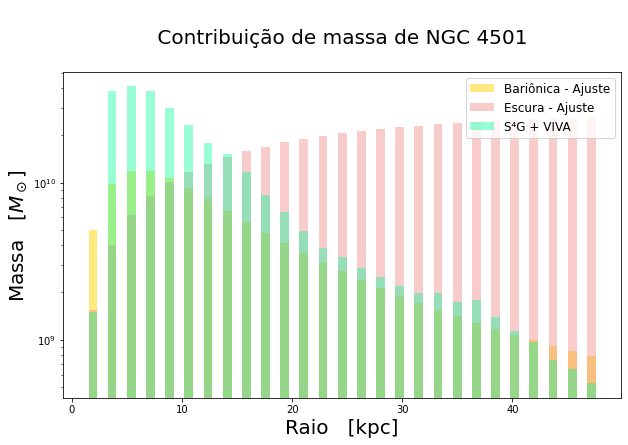

In [31]:
plt.figure(figsize=(10,6))

plt.bar(r_data,barionica,color="gold",alpha=0.5,label='Bariônica - Ajuste')
plt.bar(r_data,DM,color="lightcoral",alpha=0.4,label='Escura - Ajuste')
plt.bar(r_data,bari[0:27],color="mediumspringgreen",alpha=0.4,label='S⁴G + VIVA')

plt.title('\n Contribuição de massa de NGC 4501 \n',fontsize=20)  
plt.ylabel('Massa   [$M_\odot$]',fontsize=20)                     
plt.xlabel('Raio   [kpc]',fontsize=20)
# plt.yticks([1e7,1e8,1e10,1e11,1e12])
plt.yscale("log")
plt.legend(loc='upper right',frameon=True,fontsize=12)              

plt.show()